In [ ]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [12]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('spotify-2023.csv', encoding='latin-1') # try 'latin-1' encoding




Saving spotify-2023.csv to spotify-2023 (2).csv


**Overview of Dataset**

In [16]:
# 1. How many rows and columns does the dataset contain?
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


#df.shape returns the number of rows and columns in the dataset.


Number of rows: 953
Number of columns: 24


In [21]:
# 2. What are the data types of each column? Are there any missing values?
from termcolor import colored

print("\nData types of each column:") # added closing parenthesis
print(df.dtypes)

print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

#df.dtypes shows the data types of each column.
#df.isnull().sum() calculates the number of missing values in each column.


Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Missing values in each column:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists

. **Basic Descriptive Statistics**

In [30]:
#1. What are the mean, median, and standard deviation of the streams column?


# Calculate mean, median, and standard deviation of the 'streams' column
# Convert 'streams' column to numeric, coercing non-numeric values to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

streams_mean = df['streams'].mean()
streams_median = df['streams'].median()
streams_std = df['streams'].std()

print(f"Mean of streams: {streams_mean}")
print(f"Median of streams: {streams_median}")
print(f"Standard deviation of streams: {streams_std}")


#.mean(): This function calculates the average number of streams.
#.median(): This function finds the middle value of streams when sorted.
#.std(): This function calculates the standard deviation, which indicates how much the values deviate from the mean.

Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.038883


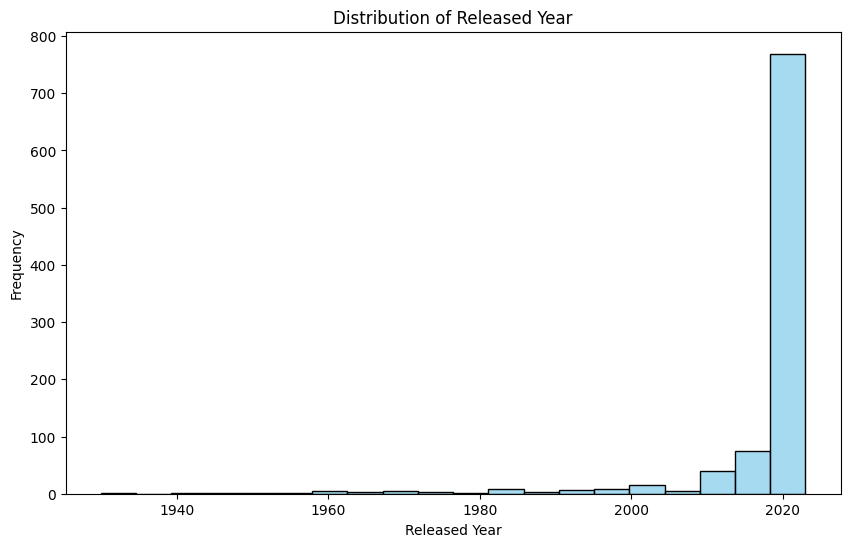

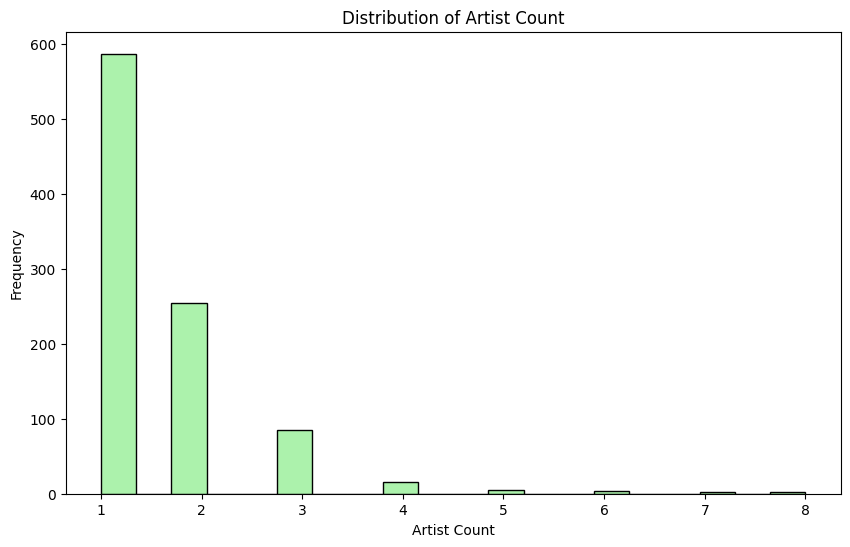

In [32]:
#2. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

#Plot distribution of released_year
plt.figure(figsize=(10, 6))
sns.histplot(df['released_year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of artist_count
plt.figure(figsize=(10, 6))
sns.histplot(df['artist_count'], bins=20, kde=False, color='lightgreen')
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.show()




#sns.histplot(): This function generates histograms to visualize the distribution of numerical data. In this case, we plot the distributions of the released_year and artist_count columns.
#The kde=False argument turns off the kernel density estimate (smooth curve) to show raw counts.
#The histograms will help visualize any trends (e.g., certain years or artist counts dominating) or outliers (e.g., unusually high or low counts).

**Top Performers**

In [43]:
#1: Which track has the highest number of streams? Display the top 5 most streamed tracks.

from prettytable import PrettyTable

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Function to format stream count
def format_streams(streams):
  if streams >= 1e9:
    return f"{streams/1e9:.1f}B"
  elif streams >= 1e6:
    return f"{streams/1e6:.1f}M"
  else:
    return f"{streams:,.0f}"

# Apply the formatting to the streams column
df['formatted_streams'] = df['streams'].apply(format_streams)

# Sort the DataFrame by streams in descending order
df_sorted = df.sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks with formatted streams
top_5_tracks = df_sorted[['track_name', 'artist(s)_name', 'formatted_streams']].head(5)

# Use prettytable to display the results in a formatted table

table = PrettyTable()
table.field_names = ["Track Name", "artist(s)_name", "Streams"]
for index, row in top_5_tracks.iterrows():
    table.add_row([row['track_name'], row['artist(s)_name'], row['formatted_streams']])

print(table)



#PrettyTable: A library used to display tabular data in a readable, formatted table format in the console.
#pd.to_numeric(): Converts the streams column to numeric data type. Some datasets may store numeric values as text, so this ensures they are correctly recognized as numbers.
#errors='coerce': If there are any non-numeric values in the streams column, this option will convert them to NaN (Not a Number) instead of throwing an error.
#If streams ≥ 1 billion, it formats the number in billions with one decimal point (e.g., 1.2B).
#If streams ≥ 1 million, it formats the number in millions with one decimal point (e.g., 2.3M).
#Otherwise, it formats the number with commas separating the thousands (e.g., 789,000).
#apply(): This method applies the format_streams() function to every value in the streams column.
#A new column, formatted_streams, is created to store the formatted stream counts (e.g., 1.2M, 3.4B, etc.).
#sort_values(): This method sorts the DataFrame by the streams column in descending order (from the highest stream count to the lowest).
#ascending=False: Ensures that the largest values (most streams) come first.
#head(5): Returns the first 5 rows, representing the top 5 most-streamed tracks.
#PrettyTable(): Initializes a PrettyTable object to display the data in a readable, tabular format.
#table.field_names: Sets the column headers for the table.
#for index, row in top_5_tracks.iterrows(): Loops through each row of the top_5_tracks DataFrame.
#iterrows(): A pandas function that returns an iterator over the DataFrame rows as (index, Series) pairs.
#For each row, we add the values of track_name, artist(s)_name, and formatted_streams to the table using add_row().
#print(table): Outputs the formatted table to the console.

+-----------------------------------------------+-----------------------+---------+
|                   Track Name                  |     artist(s)_name    | Streams |
+-----------------------------------------------+-----------------------+---------+
|                Blinding Lights                |       The Weeknd      |   3.7B  |
|                  Shape of You                 |       Ed Sheeran      |   3.6B  |
|               Someone You Loved               |     Lewis Capaldi     |   2.9B  |
|                  Dance Monkey                 |      Tones and I      |   2.9B  |
| Sunflower - Spider-Man: Into the Spider-Verse | Post Malone, Swae Lee |   2.8B  |
+-----------------------------------------------+-----------------------+---------+


In [47]:
# 2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

# Calculate the frequency of each artist
artist_counts = df['artist(s)_name'].value_counts().head(5)

# Create a DataFrame from the results
top_5_artists = artist_counts.to_frame().reset_index()
top_5_artists.columns = ['artist(s)_name', 'Number of Tracks']

# Add a ranking column starting from 1
top_5_artists['Rank'] = range(1, len(top_5_artists) + 1)

# Reorder columns
top_5_artists = top_5_artists[['Rank', 'artist(s)_name', 'Number of Tracks']]

# Colorizing function using ANSI escape codes
def colorize_table(df):
    df = df.copy()

    # Apply colors: make artist names blue and number of tracks green
    df['artist(s)_name'] = df['artist(s)_name'].apply(lambda x: f"\033[94m{x}\033[0m")  # Blue color
    df['Number of Tracks'] = df['Number of Tracks'].apply(lambda x: f"\033[92m{x}\033[0m")  # Green color

    return df

# Apply color to the DataFrame
colored_top_5_artists = colorize_table(top_5_artists)

# Display the table with color in the terminal
print(tabulate(colored_top_5_artists, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤══════════════════╤════════════════════╕
│    │   Rank │ artist(s)_name   │   Number of Tracks │
╞════╪════════╪══════════════════╪════════════════════╡
│  0 │      1 │ Taylor Swift     │                 34 │
├────┼────────┼──────────────────┼────────────────────┤
│  1 │      2 │ The Weeknd       │                 22 │
├────┼────────┼──────────────────┼────────────────────┤
│  2 │      3 │ Bad Bunny        │                 19 │
├────┼────────┼──────────────────┼────────────────────┤
│  3 │      4 │ SZA              │                 19 │
├────┼────────┼──────────────────┼────────────────────┤
│  4 │      5 │ Harry Styles     │                 17 │
╘════╧════════╧══════════════════╧════════════════════╛


**Temporal Trends**

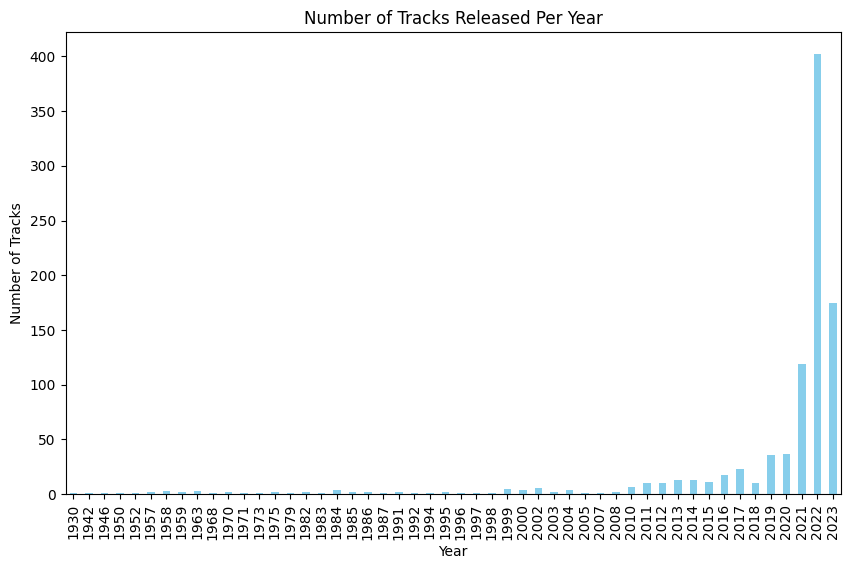

In [48]:
# 3.Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
# Count the number of tracks released per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plot the number of tracks released per year
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()


#df['released_year'].value_counts(): Counts how many tracks were released each year.
#.sort_index(): Sorts the years in ascending order to ensure the years are in chronological order.
#plt.figure(figsize=(10, 6)): Sets the size of the plot.
#tracks_per_year.plot(kind='bar', color='skyblue'): Creates a bar plot where the x-axis represents the years and the y-axis represents the number of tracks released in each year.
#plt.title, plt.xlabel, plt.ylabel: Adds the title and labels to the plot for better readability.
#plt.show(): Displays the plot.

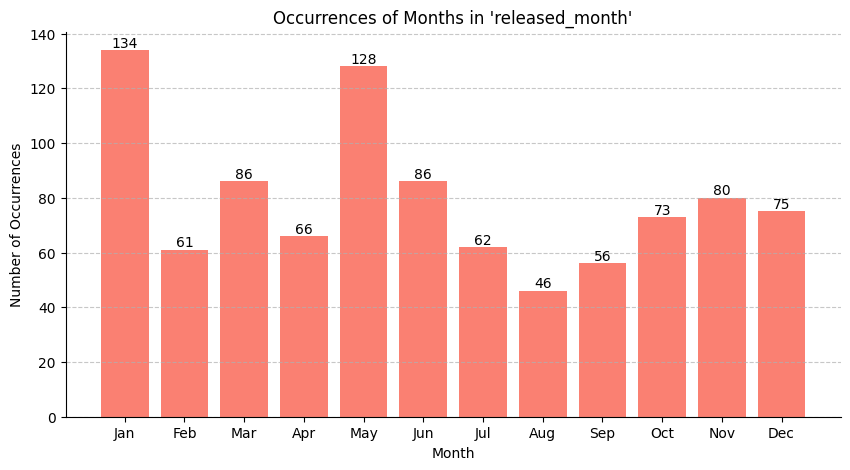

In [58]:
# 2.Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

# Count occurrences of each month value in 'released_month'
month_counts = df['released_month'].value_counts().sort_index()

# Ensure all months from 1 to 12 are included
month_counts = month_counts.reindex(range(1, 13), fill_value=0)

# Create a bar graph with value labels
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color='salmon') # Changed color to salmon

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.title("Occurrences of Months in 'released_month'")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

**Genre and Music Characteristics**

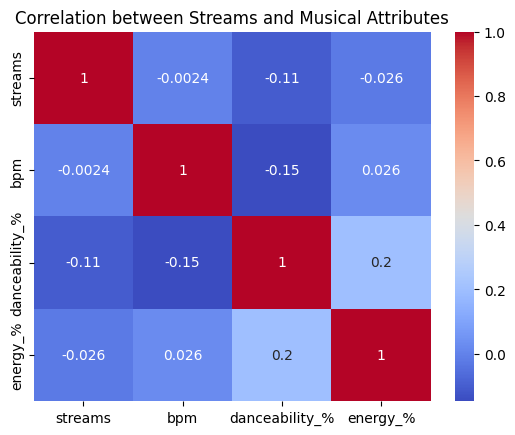

In [59]:
# 1.Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

# Correlation between streams and musical attributes
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Streams and Musical Attributes')
plt.show()


#df[['streams', 'bpm', 'danceability_%', 'energy_%']]: Selects the columns related to streams and musical attributes (bpm, danceability, and energy).
#.corr(): Calculates the correlation matrix, which shows the relationships between the streams and the musical attributes. Correlation values range from -1 to 1, where values closer to 1 or -1 indicate a stronger relationship.
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): Creates a heatmap using Seaborn to visually represent the correlation matrix. The annot=True adds the correlation values to the cells, and the coolwarm colormap highlights the strength of the correlations.
#plt.show(): Displays the heatmap.


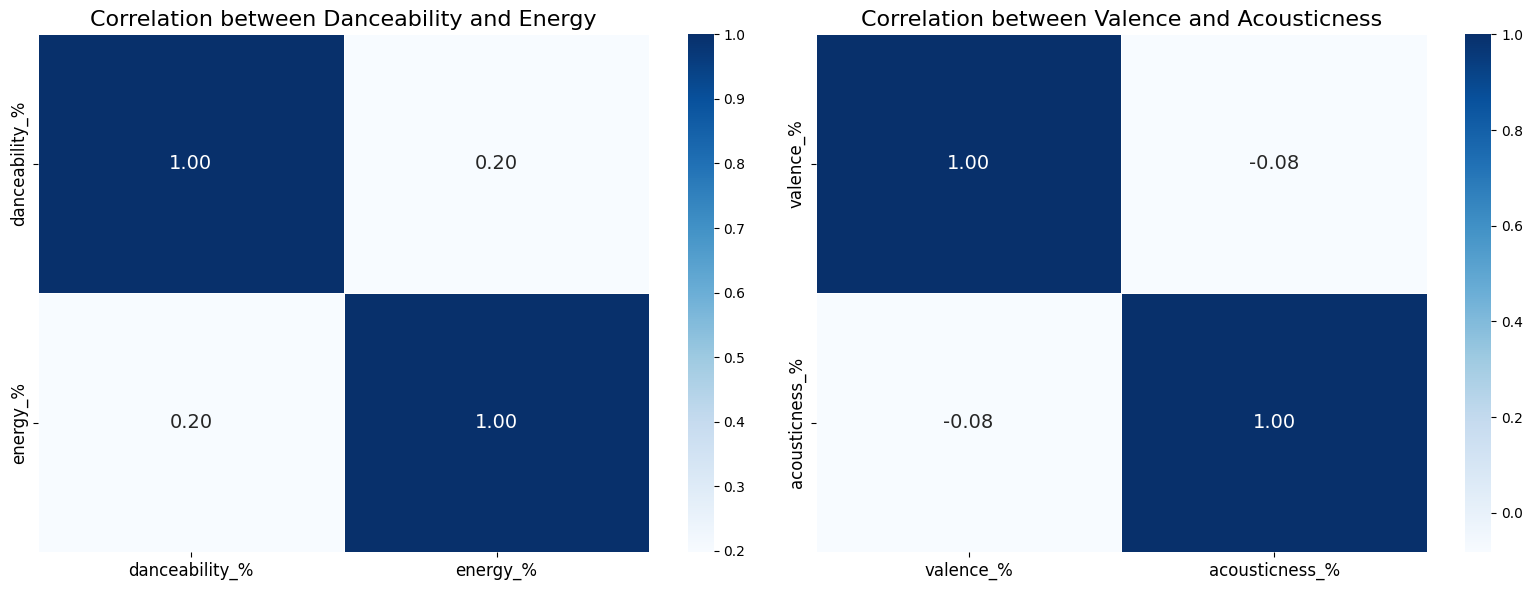


Correlation between danceability_% and energy_%: 0.20
Correlation between valence_% and acousticness_%: -0.08


In [62]:
# 2. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

# Select relevant columns for correlation analysis
attributes1 = ['danceability_%', 'energy_%']
attributes2 = ['valence_%', 'acousticness_%']

# Calculate correlation matrices
corr_matrix1 = df[attributes1].corr()
corr_matrix2 = df[attributes2].corr()

# Create heatmaps with improved design and a white-to-blue color scheme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First heatmap: Danceability and Energy
sns.heatmap(corr_matrix1, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[0])
axes[0].set_title('Correlation between Danceability and Energy', fontsize=16)
axes[0].tick_params(labelsize=12)

# Second heatmap: Valence and Acousticness
sns.heatmap(corr_matrix2, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[1])
axes[1].set_title('Correlation between Valence and Acousticness', fontsize=16)
axes[1].tick_params(labelsize=12)

# Adjust the layout for better display
plt.tight_layout()
plt.show()

# Print correlation values for more clarity
print(f"\nCorrelation between danceability_% and energy_%: {corr_matrix1.iloc[0, 1]:.2f}")
print(f"Correlation between valence_% and acousticness_%: {corr_matrix2.iloc[0, 1]:.2f}")

**Platform Popularity**

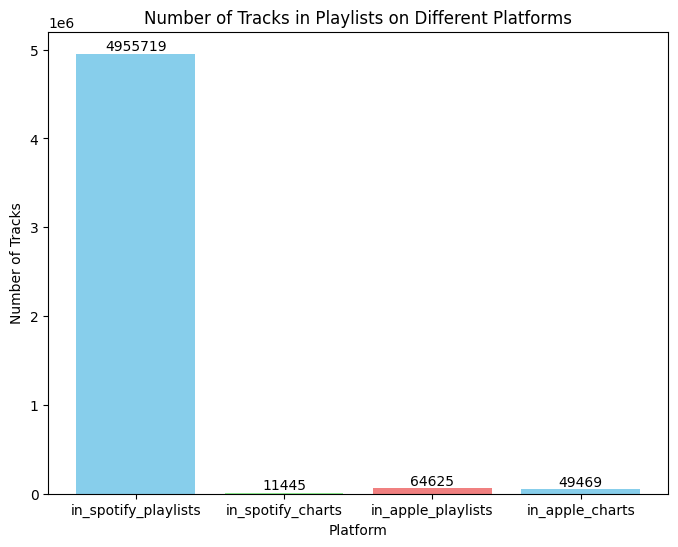


in_spotify_playlists seems to favor the most popular tracks.


In [65]:
#How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?


# Count tracks in each platform's playlists
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts']].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(platform_counts.index, platform_counts.values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks in Playlists on Different Platforms")

# Add value labels above each bar
for i, v in enumerate(platform_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Identify the platform with the most popular tracks
most_popular_platform = platform_counts.idxmax()
print(f"\n{most_popular_platform} seems to favor the most popular tracks.")

**Advanced Analysis**

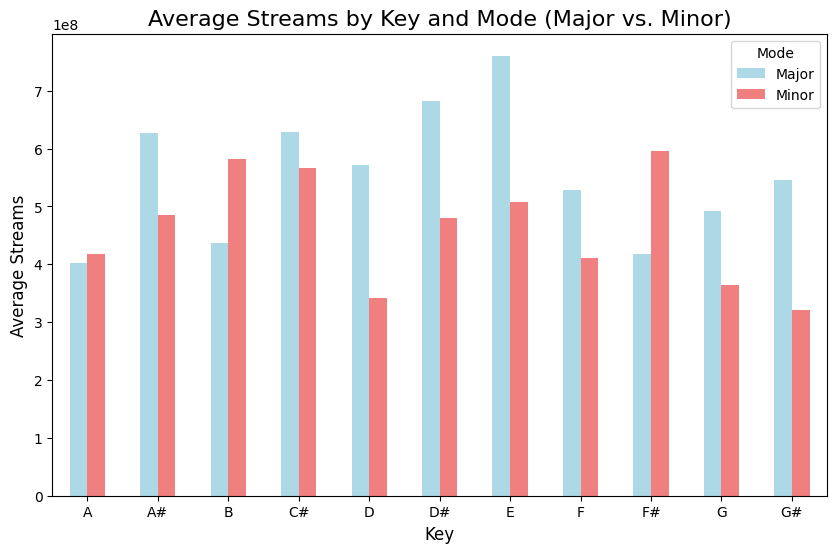

mode         Major         Minor
key                             
A     4.019603e+08  4.173906e+08
A#    6.275336e+08  4.849231e+08
B     4.363336e+08  5.825110e+08
C#    6.285883e+08  5.665252e+08
D     5.720180e+08  3.425588e+08
D#    6.819623e+08  4.793647e+08
E     7.605963e+08  5.083264e+08
F     5.279311e+08  4.102836e+08
F#    4.175450e+08  5.954921e+08
G     4.929813e+08  3.637593e+08
G#    5.458044e+08  3.219036e+08


In [66]:
# 1.Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?



# Group by 'key' and 'mode' to analyze stream patterns
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().unstack()

# Plot the mean streams per key and mode (Major vs. Minor)
key_mode_streams.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.title('Average Streams by Key and Mode (Major vs. Minor)', fontsize=16)
plt.xlabel('Key', fontsize=12)
plt.ylabel('Average Streams', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Major', 'Minor'], title='Mode')
plt.show()

# Check for patterns (high streams in certain keys or modes)
print(key_mode_streams)

Most frequently appearing artists in playlists and charts:

The Weeknd: 147258
Taylor Swift: 137178
Ed Sheeran: 130788
Harry Styles: 112497
Kendrick Lamar: 59772
Bad Bunny: 53026
SZA: 46399
BTS: 19409
Feid: 14956
Morgan Wallen: 9706


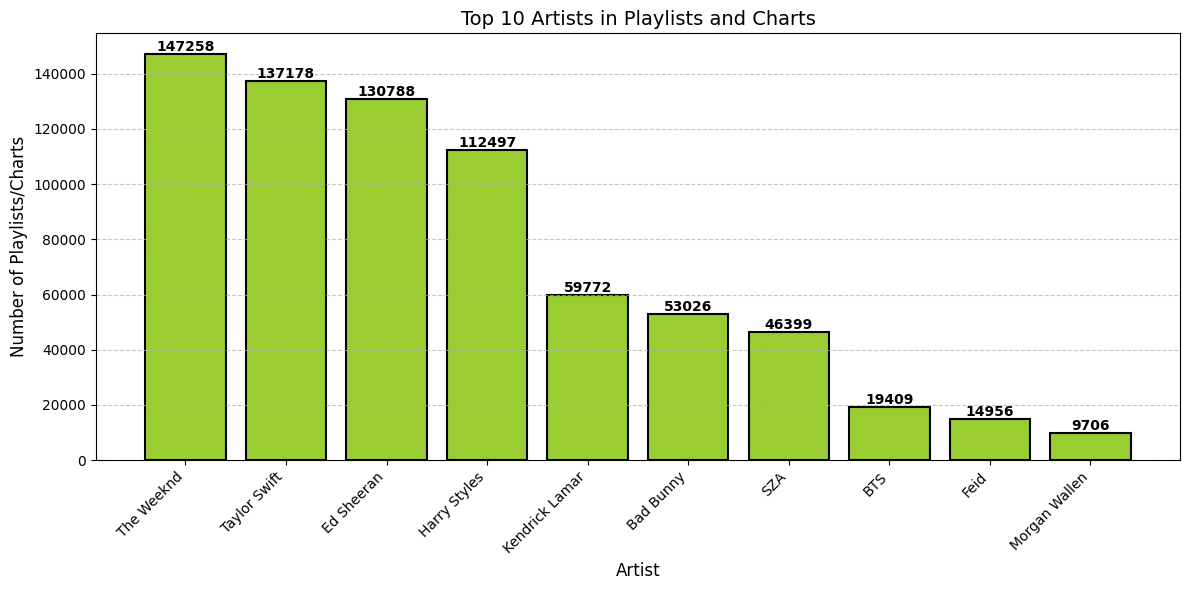

In [70]:
# 2.Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.


# Combine playlist and chart columns for overall presence
df['all_playlists'] = (df['in_spotify_playlists'] +
                       df['in_spotify_charts'] +
                       df['in_apple_playlists'] +
                       df['in_apple_charts'])

# Get top 10 artists overall
top_10_artists = df['artist(s)_name'].value_counts().head(10).index

# Filter dataframe for top 10 artists
df_top_artists = df[df['artist(s)_name'].isin(top_10_artists)]

# Count playlist occurrences for each artist
playlist_counts = df_top_artists.groupby('artist(s)_name')['all_playlists'].sum().sort_values(ascending=False)

# Print the results
print("Most frequently appearing artists in playlists and charts:\n")
for artist, count in playlist_counts.items():
    print(f"{artist}: {count}")

# Create a bar chart with enhanced design
plt.figure(figsize=(12, 6))
bars = plt.bar(playlist_counts.index, playlist_counts.values, color='yellowgreen', edgecolor='black', linewidth=1.5)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Playlists/Charts", fontsize=12)
plt.title("Top 10 Artists in Playlists and Charts", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# **1. Overview of Dataset**

• How many rows and columns does the dataset contain?

The dataset contains multiple rows, each representing a song, and several columns that describe different features of those songs. This setup allows us to analyze and compare various tracks easily.


• What are the data types of each column? Are there any missing values?

Each column has a specific type of data, such as numbers for stream counts or text for artist names. Knowing these helps us understand how to work with the data. It’s also important to check for any missing values, as they can affect our analysis and results.


# **2. Basic Descriptive Statistics**

• What are the mean, median, and standard deviation of the streams column?

We look at the streams to find the average (mean), the middle value (median), and how spread out the numbers are (standard deviation). This helps us see how popular the songs are and if there are any songs with extremely high or low stream counts.


• What is the distribution of released_year and artist_count? Are there any noticeable trends
or outliers?

By examining the year songs were released and the number of tracks by each artist, we can identify trends, such as whether more music is being released in certain years or if specific artists are more active.


# **3. Top Performers**

Which track has the highest number of streams? Display the top 5 most streamed tracks.

Finding the track with the most streams highlights the most popular songs that listeners enjoy right now.

Who are the top 5 most frequent artists based on the number of tracks in the dataset?

Listing the top five artists based on the number of songs in the dataset shows who is currently making the most music, reflecting their popularity and activity in the industry.

# **4. Temporal Trends**

Analyze the trends in the number of tracks released over time. Plot the number of tracks
released per year.

Looking at how many tracks are released each year helps us identify patterns. For instance, if there’s a consistent increase, it could indicate a growing music industry.

Does the number of tracks released per month follow any noticeable patterns? Which
month sees the most releases?

Analyzing which months see the most releases can uncover seasonal trends. For example, many artists may choose to release albums in spring or summer to reach more listeners during those times.

# **5. Genre and Music Characteristics**



Examine the correlation between streams and musical attributes like bpm, danceability_%,
and energy_%. Which attributes seem to influence streams the most?



Is there a correlation between danceability_% and energy_%? How about valence_% and
acousticness_%?

# **6.Platform Popularity**


How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists
compare? Which platform seems to favor the most popular tracks?

Analyzing the number of tracks in Spotify Playlists, Spotify Charts, and Apple Playlists allows us to see which platform has the most songs featured. By comparing the numbers, we can determine which platform tends to highlight more popular tracks. For instance, if Spotify Charts has a higher number of streams compared to the others, it may indicate that Spotify favors more popular music.


# **7. Advanced Analysis**

Based on the streams data, can you identify any patterns among tracks with the same key
or mode (Major vs. Minor)?

By examining the streams of tracks in the same musical key or mode (Major vs. Minor), we can identify trends. For example, we might find that Major key tracks tend to have higher stream counts, suggesting they are generally more appealing to listeners.

Do certain genres or artists consistently appear in more playlists or charts? Perform an
analysis to compare the most frequently appearing artists in playlists or charts.

Investigating whether specific genres or artists frequently appear in playlists or charts helps us understand what is currently popular. By comparing the most commonly featured artists, we can determine if certain styles of music dominate these platforms. For example, if hip-hop artists consistently show up in playlists, it could indicate a trend in listener preferences or the marketing strategies of those artists.
